### Comparing Aggregate Models for Regression

This try-it focuses on utilizing ensemble models in a regression setting.  Much like you have used individual classification estimators to form an ensemble of estimators -- here your goal is to explore ensembles for regression models.  As with your earlier assignment, you will use scikitlearn to carry out the ensembles using the `VotingRegressor`.   


#### Dataset and Task

Below, a dataset containing census information on individuals and their hourly wage is loaded using the `fetch_openml` function.  OpenML is another repository for datasets [here](https://www.openml.org/).  Your task is to use ensemble methods to explore predicting the `wage` column of the data.  Your ensemble should at the very least consider the following models:

- `LinearRegression` -- perhaps you even want the `TransformedTargetRegressor` here.
- `KNeighborsRegressor`
- `DecisionTreeRegressor`
- `Ridge`
- `SVR`

Tune the `VotingRegressor` to try to optimize the prediction performance and determine if the wisdom of the crowd performed better in this setting than any of the individual models themselves.  Report back on your findings and discuss the interpretability of your findings.  Is there a way to determine what features mattered in predicting wages?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Load dataset
survey = fetch_openml(data_id=534, as_frame=True).frame

/home/elmunoz42/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
# Display the first few rows to understand the data
survey.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


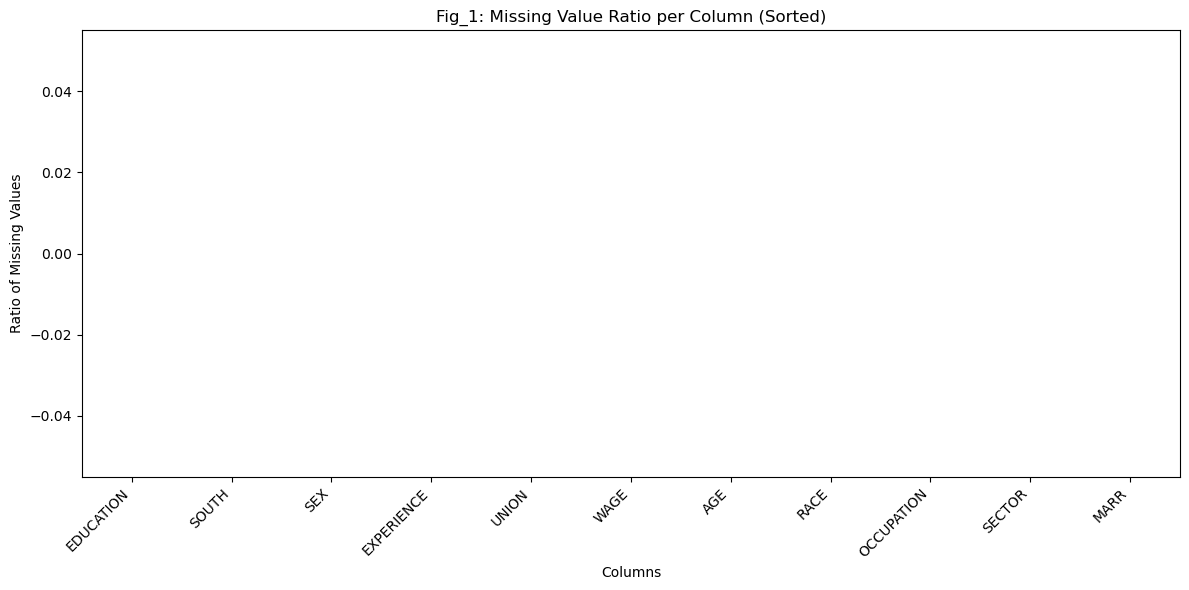

In [23]:
import seaborn as sns
# Gets the mean of missing values in each column. Since True = 1 and False = 0 the mean tells us how much of the data is missing.
df_survey_w_missing_values = survey.isnull().mean().sort_values(ascending=False)

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(x=df_survey_w_missing_values.index, y=df_survey_w_missing_values.values, color='red')

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Ratio of Missing Values')
plt.title('Fig_1: Missing Value Ratio per Column (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
X = survey.drop('WAGE', axis=1)
y = survey['WAGE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42, shuffle=True)

In [25]:
# make_column_selector?

In [33]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use make_column_selector to automatically select columns of the right type
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_transformer, make_column_selector(dtype_include=['object', 'category']))
])


In [34]:
# LinearRegression Pipeline
pipe_lnr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipe_lnr.fit(X_train, y_train)
mse_lnr = mean_squared_error(y_test, pipe_lnr.predict(X_test))
print(f"mse_lnr: {mse_lnr}")

mse_lnr: 18.534346246240382


In [37]:
pipe_knnr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])
pipe_knnr.fit(X_train, y_train)
mse_knnr = mean_squared_error(y_test, pipe_knnr.predict(X_test))
print(f"mse_knnr: {mse_knnr}")

mse_knnr: 21.74474119774011


In [40]:
pipe_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])
pipe_dtr.fit(X_train, y_train)
mse_dtr = mean_squared_error(y_test, pipe_dtr.predict(X_test))
print(f"mse_dtr: {mse_dtr}")

mse_dtr: 55.37478898305084


In [46]:
# Ridge?

In [47]:
pipe_ridge_0_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])
pipe_ridge_0_1.fit(X_train, y_train)
mse_ridge_0_1 = mean_squared_error(y_test, pipe_ridge_0_1.predict(X_test))
print(f"mse_ridge_0_1: {mse_ridge_0_1}")

mse_ridge_0_1: 18.528447594885282


In [41]:
pipe_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])
pipe_ridge.fit(X_train, y_train)
mse_ridge = mean_squared_error(y_test, pipe_ridge.predict(X_test))
print(f"mse_ridge: {mse_ridge}")

mse_ridge: 18.53322373814974


In [48]:
pipe_ridge_10 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10))
])
pipe_ridge_10.fit(X_train, y_train)
mse_ridge_10 = mean_squared_error(y_test, pipe_ridge_10.predict(X_test))
print(f"mse_ridge_10: {mse_ridge_10}")

mse_ridge_10: 18.666339242838877


In [49]:
pipe_SVR= Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])
pipe_SVR.fit(X_train, y_train)
mse_SVR = mean_squared_error(y_test, pipe_SVR.predict(X_test))
print(f"mse_SVR: {mse_SVR}")

mse_SVR: 20.102175302862026


In [16]:
regressors = [
    ('lnr', LinearRegression()),
    ('knnr', KNeighborsRegressor()),
    ('dtr', DecisionTreeRegressor()),
    ('ridge', Ridge()),
    ('SVR', SVR())
]

In [19]:
# VotingRegressor?

In [51]:
ensemble = VotingRegressor(regressors)
pipe_ensemble = Pipeline([
    ('preprocessor', preprocessor),
    ('ensemble', ensemble)
])
pipe_ensemble.fit(X_train, y_train)
mse_ensemble = mean_squared_error(y_test, pipe_ensemble.predict(X_test))
print(f"mse_ensemble: {mse_ensemble}")

mse_ensemble: 20.905989717118334


In [86]:
model_mses = pd.DataFrame({
    'mse_ridge_0_1': [18.528448],
    'mse_lnr': [18.534346],
    'mse_optimized_ensemble': [19.08845122179026],
    'mse_SVR': [20.102175],
    'mse_ensemble': [20.90599],
    'mse_knnr': [21.744741],
    'mse_dtr': [55.374789]
})
print(model_mses)

   mse_ridge_0_1    mse_lnr  mse_optimized_ensemble    mse_SVR  mse_ensemble  \
0      18.528448  18.534346               19.088451  20.102175      20.90599   

    mse_knnr    mse_dtr  
0  21.744741  55.374789  


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'mse_ridge_0_1'),
  Text(1, 0, 'mse_lnr'),
  Text(2, 0, 'mse_optimized_ensemble'),
  Text(3, 0, 'mse_SVR'),
  Text(4, 0, 'mse_ensemble'),
  Text(5, 0, 'mse_knnr'),
  Text(6, 0, 'mse_dtr')])

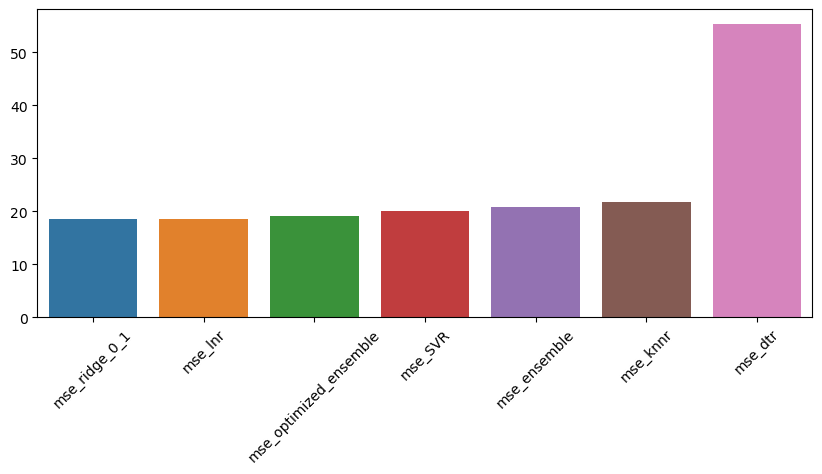

In [88]:
plt.figure(figsize=(10, 4))
sns.barplot(model_mses)
plt.xticks(rotation=45)

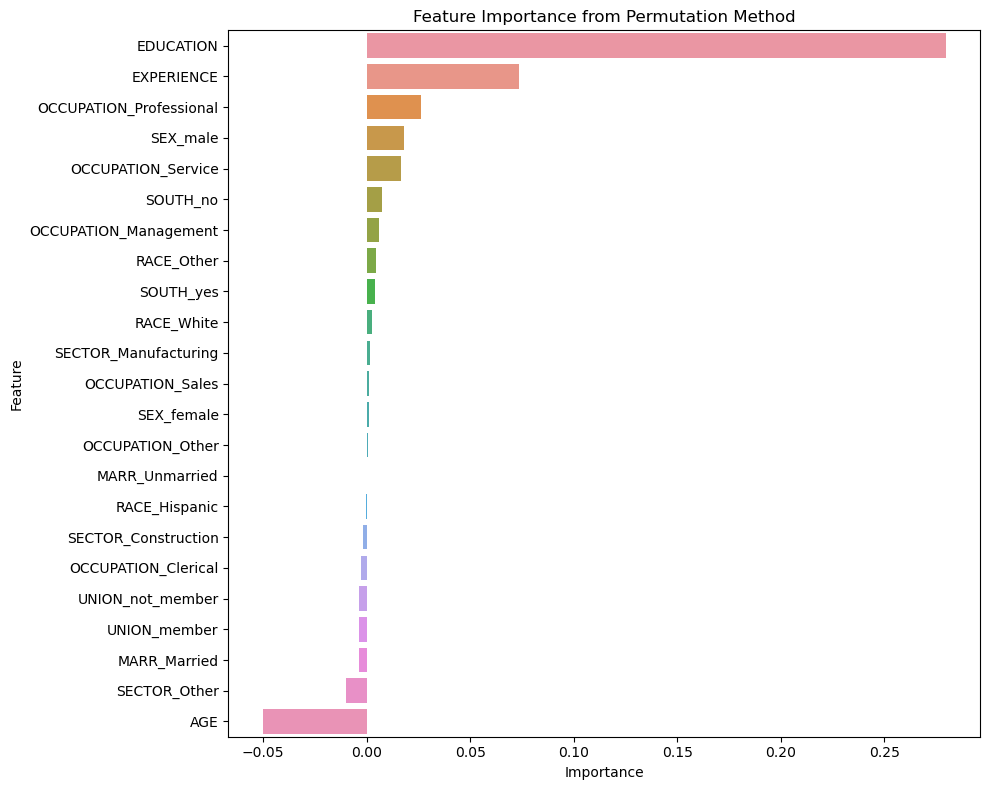

In [79]:
from sklearn.inspection import permutation_importance

# Get feature names after preprocessing
feature_names = []
for name, transformer, cols in preprocessor.transformers_:
    if name != 'remainder':
        if transformer.__class__.__name__ == 'Pipeline':
            if hasattr(transformer.steps[-1][1], 'get_feature_names_out'):
                transformed_names = transformer.steps[-1][1].get_feature_names_out(cols)
                feature_names.extend(transformed_names)
        elif hasattr(transformer, 'get_feature_names_out'):
            transformed_names = transformer.get_feature_names_out(cols)
            feature_names.extend(transformed_names)
        else:
            feature_names.extend(cols)

# Create the X_test_transformed with the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Calculate permutation importance
result = permutation_importance(ensemble, X_test_transformed, y_test, n_repeats=10, random_state=42)

# Create a DataFrame with the results
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Permutation Method')
plt.tight_layout()
plt.show()

In [84]:
# GridSearchCV?

In [85]:
# Define parameter grid for each regressor
param_grid = {
    # KNN parameters
    'ensemble__knnr__n_neighbors': [3, 5, 7, 10],
    'ensemble__knnr__weights': ['uniform', 'distance'],
    
    # Decision Tree parameters
    'ensemble__dtr__max_depth': [None, 5, 10, 15],
    'ensemble__dtr__min_samples_split': [2, 5, 10],
    
    # Ridge parameters
    'ensemble__ridge__alpha': [0.01, 0.1, 1.0, 10.0],
    
    # SVR parameters
    'ensemble__SVR__C': [0.1, 1.0, 10.0],
    'ensemble__SVR__gamma': ['scale', 'auto', 0.1, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    pipe_ensemble,       # Your pipeline with preprocessor and ensemble
    param_grid,          # Parameter grid to search
    cv=5,                # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize
    n_jobs=-1,           # Use all available cores
    verbose=1            # Display progress
)

# Fit the grid search
print("Starting grid search...")
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)  # Convert back to MSE from negative

# Evaluate on test data
best_pipeline = grid_search.best_estimator_
test_mse = mean_squared_error(y_test, best_pipeline.predict(X_test))
print(f"Test MSE with best parameters: {test_mse}")

Starting grid search...
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits
Best parameters: {'ensemble__SVR__C': 10.0, 'ensemble__SVR__gamma': 0.01, 'ensemble__dtr__max_depth': 5, 'ensemble__dtr__min_samples_split': 2, 'ensemble__knnr__n_neighbors': 10, 'ensemble__knnr__weights': 'uniform', 'ensemble__ridge__alpha': 10.0}
Best MSE: 19.08845122179026
Test MSE with best parameters: 20.70959882955294
